## Load data from CSV file
### Attribute Information:
**No** : row number   
**year** : year of data in this row  
**month** : month of data in this row  
**day** : day of data in this row   
**hour** : hour of data in this row   
**pm2.5** : PM2.5 concentration  
**DEWP** : Dew Point  
**TEMP** : Temperature  
**PRES** : Pressure  
**cbwd** : Combined wind direction    
**Iws** : Cumulated wind speed    
**Is** : Cumulated hours of snow   
**Ir** : Cumulated hours of rain 




In [66]:
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [67]:
import csv


# Repository class
# - contains method to read data from csv file on columns
# - fields : fileName = the name of the file from where the reading is done
class Repository(object): 

    # constructor
    # sets the values of the fields
    def __init__(self,fileName):
        self.fileName = fileName

    # loadData method :
    # input : inputColumns = array of strings representing the name of the columns needed
    # output : inputData = array of arrays 
    #                    = each array contains the data of one column
    # the data type is respected
    def  loadData_columns(self,inputColumns):
        data=[]
        columns=[]
        file = open(self.fileName)
        parsedData = csv.reader(file,delimiter=',')
       
        # get the number of lines in the file
        noLines = 0
        for line in parsedData:
            if noLines == 0:
                # if it is the first line, than this line contains the name of the attributes
                columns = line
            else:
                # otherwise it contains data 
                data.append(line)
            # the number of lines is increased
            noLines += 1
        
        print(columns)
        print('\n')

        # in an array we store the indeces of the attributes we want to get data from
        inputColumnsIndex = []
        for i in range(len(inputColumns)):
            inputColumnsIndex.append(columns.index(inputColumns[i]))

        # initialize an array for each attribute
        inputData = []
        for i in range (len(inputColumnsIndex)):
            inputData.append([])

        # parse data into arrays depending on attribute
        for i in range(len(data)):
            for j in range (len(inputColumnsIndex)):
                if j == 7  or j == 6  or j == 5:
                    # the seventh, the sixth and the fifth needed column contains floats
                    inputData[j].append(float(data[i][inputColumnsIndex[j]]))
                else:
                    # the other needed columns contains ints
                    inputData[j].append(int(data[i][inputColumnsIndex[j]]))


        file.close()
        
        return inputData

    def  loadData_rows(self,inputColumns):
        data=[]
        columns=[]
        file = open(self.fileName)
        parsedData = csv.reader(file,delimiter=',')
       
        # get the number of lines in the file
        noLines = 0
        for line in parsedData:
            if noLines == 0:
                # if it is the first line, than this line contains the name of the attributes
                columns = line
            else:
                # otherwise it contains data 
                data.append(line)
            # the number of lines is increased
            noLines += 1
        
        print(columns)
        print('\n')

        # in an array we store the indeces of the attributes we want to get data from
        inputColumnsIndex = []
        for i in range(len(inputColumns)):
            inputColumnsIndex.append(columns.index(inputColumns[i]))

        # initialize an array
        inputData = []
       
        # parse data into arrays depending on attribute
        for i in range(len(data)):
            x = []
            for j in range (len(inputColumnsIndex)):
                if j == 7  or j == 6  or j == 5:
                    # the seventh, the sixth and the fifth needed column contains floats
                    x.append(float(data[i][inputColumnsIndex[j]]))
                else:
                    # the other needed columns contains ints
                    x.append(int(data[i][inputColumnsIndex[j]]))

            inputData.append(x)
        file.close()
        
        return inputData

In [68]:
filename = "data.csv"
repository = Repository(filename)

# specify the names of the needed attributes
inputColumn1 = 'year'
inputColumn2 = 'month'
inputColumn3 = 'day'
inputColumn4 = 'hour'
inputColumn5 = 'DEWP'
inputColumn6 = 'TEMP'
inputColumn7 = 'PRES'
inputColumn8 = 'Iws'
inputColumn9 = 'Is'


inputColumns = []
inputColumns.append(inputColumn1)
inputColumns.append(inputColumn2)
inputColumns.append(inputColumn3)
inputColumns.append(inputColumn4)
inputColumns.append(inputColumn5)
inputColumns.append(inputColumn6)
inputColumns.append(inputColumn7)
inputColumns.append(inputColumn8)
inputColumns.append(inputColumn9)


inputDataResult1,inputDataResult2,inputDataResult3,inputDataResult4,inputDataResult5,inputDataResult6,inputDataResult7,inputDataResult8,inputDataResult9 = repository.loadData_columns(inputColumns)
print('inputs for column '+inputColumn1 +' are: \n'+str(inputDataResult1[:10])+'\n'+'\n')
print('inputs for column '+inputColumn2 +' are: \n'+str(inputDataResult2[:10])+'\n'+'\n')
print('inputs for column '+inputColumn3 +' are: \n'+str(inputDataResult3[:10])+'\n'+'\n')
print('inputs for column '+inputColumn4 +' are: \n'+str(inputDataResult4[:10])+'\n'+'\n')
print('inputs for column '+inputColumn5 +' are: \n'+str(inputDataResult5[:10])+'\n'+'\n')
print('inputs for column '+inputColumn6 +' are: \n'+str(inputDataResult6[:10])+'\n'+'\n')
print('inputs for column '+inputColumn7 +' are: \n'+str(inputDataResult7[:10])+'\n'+'\n')
print('inputs for column '+inputColumn8 +' are: \n'+str(inputDataResult8[:10])+'\n'+'\n')
print('inputs for column '+inputColumn9 +' are: \n'+str(inputDataResult9[:10])+'\n'+'\n')

inputDataResult = repository.loadData_rows(inputColumns)
print('inputs for rows are: \n'+str(inputDataResult[:10]))

['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']


inputs for column year are: 
[2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010]


inputs for column month are: 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


inputs for column day are: 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


inputs for column hour are: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


inputs for column DEWP are: 
[-21, -21, -21, -21, -20, -19, -19, -19, -19, -20]


inputs for column TEMP are: 
[-11.0, -12.0, -11.0, -14.0, -12.0, -10.0, -9.0, -9.0, -9.0, -8.0]


inputs for column PRES are: 
[1021.0, 1020.0, 1019.0, 1019.0, 1018.0, 1017.0, 1017.0, 1017.0, 1017.0, 1017.0]


inputs for column Iws are: 
[1.79, 4.92, 6.71, 9.84, 12.97, 16.1, 19.23, 21.02, 24.15, 27.28]


inputs for column Is are: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']


inputs for rows are: 
[[2010, 1, 1, 0, -21, -11.0, 1021.0, 1.79, 0], [20

In [69]:
# import numpy as np

# fig = plt.figure()
# ax = plt.axes(projection="3d")



# z_points = np.array(inputData[5])
# x_points = np.array(inputData[6])
# y_points = np.array(inputData[7]) 
# ax.scatter(x_points, y_points, z_points, color="r")

# plt.show()

### Scale data

In [70]:
print ("\n ORIGINAL VALUES: \n\n", inputDataResult[:10]) 
# Min-Max Scaler
# min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# scaled_data= min_max_scaler.fit_transform(inputDataResult) 
# print ("\n VALUES AFTER MIN MAX SCALING: \n\n", scaled_data[:10]) 
# Standardization Scaler
Standardisation = preprocessing.StandardScaler() 
scaled_data= Standardisation.fit_transform(inputDataResult) 
print ("\n\n VALUES AFTER STANDARDIZATION : \n\n", scaled_data[:10]) 


 ORIGINAL VALUES: 

 [[2010, 1, 1, 0, -21, -11.0, 1021.0, 1.79, 0], [2010, 1, 1, 1, -21, -12.0, 1020.0, 4.92, 0], [2010, 1, 1, 2, -21, -11.0, 1019.0, 6.71, 0], [2010, 1, 1, 3, -21, -14.0, 1019.0, 9.84, 0], [2010, 1, 1, 4, -20, -12.0, 1018.0, 12.97, 0], [2010, 1, 1, 5, -19, -10.0, 1017.0, 16.1, 0], [2010, 1, 1, 6, -19, -9.0, 1017.0, 19.23, 0], [2010, 1, 1, 7, -19, -9.0, 1017.0, 21.02, 0], [2010, 1, 1, 8, -19, -9.0, 1017.0, 24.15, 0], [2010, 1, 1, 9, -20, -8.0, 1017.0, 27.28, 0]]


 VALUES AFTER STANDARDIZATION : 

 [[-1.41460097 -1.60170963 -1.67374446 -1.66132477 -1.58087789 -1.92225045
   0.44332765 -0.44189385 -0.06935299]
 [-1.41460097 -1.60170963 -1.67374446 -1.51686175 -1.58087789 -2.00422792
   0.3459432  -0.37930644 -0.06935299]
 [-1.41460097 -1.60170963 -1.67374446 -1.37239873 -1.58087789 -1.92225045
   0.24855876 -0.34351365 -0.06935299]
 [-1.41460097 -1.60170963 -1.67374446 -1.2279357  -1.58087789 -2.16818286
   0.24855876 -0.28092624 -0.06935299]
 [-1.41460097 -1.60170963 -

### Apply K-means algorithm

In [71]:
# specify parameters for K-means algorithm
kmeans = KMeans(
    init="random",
    n_clusters=35,
    n_init=10,
    max_iter=300,
    random_state=42
)
# apply algorithm on sclaed data 
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=35, random_state=42)

### Analyze K-means results 

In [72]:
# The lowest SSE(Sum of Squared Error) value
print("SSE - "+str(kmeans.inertia_)+"\n")


# Final locations of the centroid
print("Centroids - "+str(kmeans.cluster_centers_)+"\n")



# The number of iterations required to converge
print("No of iterations - "+str(kmeans.n_iter_)+"\n")

SSE - 93134.63268309577

Centroids - [[ 7.38916206e-01  2.18368578e-02  8.30550449e-01  2.47822385e-01
   9.96062878e-01  1.35703625e+00 -1.11035879e+00 -2.23051705e-01
  -6.93529928e-02]
 [-1.10245575e+00 -1.25069799e+00 -9.38192879e-01 -8.88846936e-01
  -1.10583326e+00 -1.35635942e+00  1.05228738e+00 -1.31085212e-01
   3.01447466e-02]
 [ 7.30443239e-01 -1.36510152e+00 -6.81925730e-01 -8.86916307e-01
  -1.10311347e+00 -1.42530046e+00  1.24039307e+00 -2.31580077e-01
   3.28472703e-02]
 [-8.85051389e-01  1.19396809e+00 -6.18128632e-01  9.12213222e-01
  -3.31993904e-02 -1.29537465e-01  3.75114834e-01 -2.14002393e-01
  -6.54183450e-02]
 [-6.86599005e-01  8.91902229e-01  6.69799429e-01 -6.72835275e-01
   3.78734363e-01  3.56114613e-02  2.65796149e-01 -2.86769111e-01
  -6.93529928e-02]
 [ 9.96549738e-01  1.32971216e+00  4.52596193e-01 -9.87201793e-01
  -6.66422467e-01 -9.78286963e-01  8.88055021e-01 -2.69202231e-01
  -6.21268608e-02]
 [-1.09202908e+00  1.90151627e-01 -8.54581474e-01  7.6609

*Elbow Method*

In [73]:
# kmeans_kwargs = {
#     "init": "random",
#     "n_init": 10,
#     "max_iter": 300,
#     "random_state": 42,
# }

# # A list holds the SSE values for each k
# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(scaled_data)
#     sse.append(kmeans.inertia_)

## Visualize Data

*imports*

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [75]:
data = pd.read_csv('D:\ANUL_III_2\MIASC\Project\data.csv')
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


*show data on relevant columns*
**TEMP** : Temperature  
**PRES** : Pressure  
**cbwd** : Combined wind direction    
**Iws** : Cumulated wind speed    
**Is** : Cumulated hours of snow   
**Ir** : Cumulated hours of rain 


C:\Users\User\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



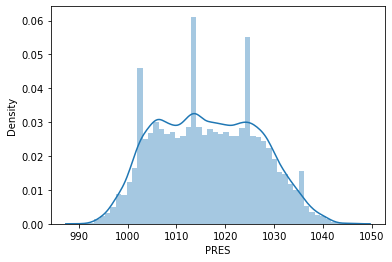

In [77]:
sns.distplot(data['PRES'])
plt.show()

C:\Users\User\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



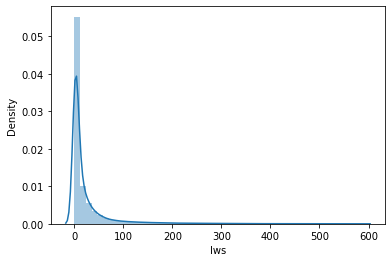

In [78]:
sns.distplot(data['Iws'])
plt.show()

C:\Users\User\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



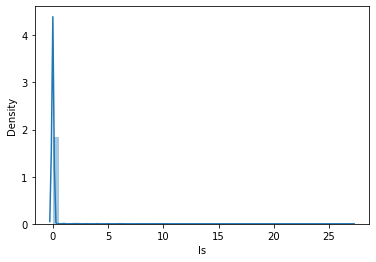

In [79]:
sns.distplot(data['Is'])
plt.show()

C:\Users\User\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



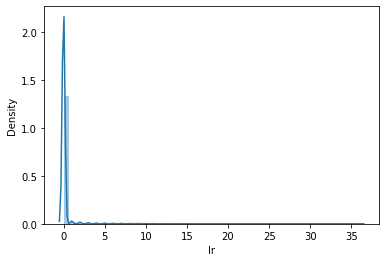

In [80]:
sns.distplot(data['Ir'])
plt.show()

In [81]:

#Initialize our model
kmeans = KMeans(n_clusters=5)

In [82]:
#Fit our model
kmeans.fit(scaled_data)

KMeans(n_clusters=5)

In [83]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(scaled_data)[:5000]

In [84]:
#Add the cluster vector to our DataFrame
# scaled_data[9] = clusters

In [85]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(scaled_data[:5000]))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = inputColumns

## Applying Principal Component Analysis (PCA)

In [86]:
#PCA with two principal components
pca_2d = PCA(n_components=2)

In [87]:
#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX))

In [88]:
#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

In [89]:
plotX = pd.concat([plotX,PCs_2d], axis=1, join='inner')

In [90]:
plotX["dummy"] = 0

In [91]:

cluster0 = plotX[clusters == 0]
cluster1 = plotX[clusters == 1]
cluster2 = plotX[clusters == 2]
cluster3 = plotX[clusters == 3]
cluster4 = plotX[clusters == 4]

In [92]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

In [93]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text = None)

#trace5 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster4["PC1_2d"],
                    y = cluster4["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3,trace4,trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)